# Рекурентная нейронная сеть LSTM

Для примера выбрана **регрессионная задача** расчёта суммы последовательности чисел.

Для каждого $i$-го примера модель предсказывает сумму всех элементов на входе:

$$ y_i = \sum X_i, $$

В одном примере на вход приходит 3 числа:
$$ X_i = [x_1, x_2, x_3] $$

Числа на входе лежат в интервале от 0 до 0.3, для нормализации выхода сети.
$$ x_n \in [0, 0.3], \  0 < \sum X_i < 1 $$

In [15]:
#Подключаем нужнае библиотеки:
import numpy as np

# Модель нейронной сети
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import *
from keras.layers import *
from keras.regularizers import *
from keras.callbacks import *
from keras.optimizers import *

# Библиотеки sklearn, для данных, их подготовки, нормализации
from sklearn.cross_validation import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.externals.joblib import load, dump

# Графики
import matplotlib.pyplot as plt
%matplotlib inline

# Данные

Для примера сгенирирует 250 последовательностей случайных чисел длиной 3. 

220 последовательностей для обучения и 30 для тестирования.

In [2]:
#Данные
x_train = np.random.random((220, 3, 1))/3.
x_test  = np.random.random((30, 3, 1))/3.
y_train = np.sum(x_train, axis=1)
y_test  = np.sum(x_test,  axis=1)

In [3]:
print 'Данные на вход:\n', x_train[0],  '\n\nВыходные данные (сумма чисел из входных данных):\n',y_train[0]
print '\ninput_shape:', x_train.shape[1:]

Данные на вход:
[[ 0.00803537]
 [ 0.19322499]
 [ 0.07869979]] 

Выходные данные (сумма чисел из входных данных):
[ 0.27996014]

input_shape: (3, 1)


# Модель

## Настройки модели

Добавляем слой нейронов LSTM(n, input_shape, return_sequences), где:

1) **n** - Количество нейронов в слое;

2) **input_shape(timesteps, input_dim)** - форма входного сигнала. Здесь указывается 2 числа:
 - timesteps
 - input_dim

timesteps - Длина входных последовательностей, необходимо указать, когда она постоянна. Указывается на уровне первого слоя. Необходим, если в модели будут **Dense** слои (Полносвязные слои нейрнной сети).

input_dim - Целое число. Параметр необходим при использовании слоя в качестве первого слоя модели. Отражает количество последовательностей на входе.

3) **return_sequences** - Булевый параметр (принемает значение True и False). 
 - Если True - возвращает последний выходной сигнал в выходной последовательности;
 - Если False - возвращает всю последовательность.
Для добавления ещё одного слоя LSTM - устанавливается значение True.

In [8]:
#Модель
model = Sequential()
model.add(LSTM(8, input_shape=x_train.shape[1:], return_sequences=False))

model.add(Dense(1))
model.add(Activation('relu'))

model.compile(loss='mae', optimizer='adam')

#Параметры ранней остановки и сохранение лучшей модели
early_stopper = EarlyStopping(monitor='val_loss', patience=90)
callback_save_model = ModelCheckpoint("models/Lab2.hdf5", save_best_only=True)

history = model.fit(x_train, y_train, batch_size=15, nb_epoch=100, show_accuracy=True, validation_split = 0.1, callbacks = [callback_save_model, early_stopper])

pred = model.predict(x_test)

Train on 198 samples, validate on 22 samples
Epoch 1/100
198/198 [==============================] - 0s - loss: 0.4105 - val_loss: 0.3589
Epoch 2/100
198/198 [==============================] - 0s - loss: 0.3574 - val_loss: 0.3038
Epoch 3/100
198/198 [==============================] - 0s - loss: 0.2991 - val_loss: 0.2415
Epoch 4/100
198/198 [==============================] - 0s - loss: 0.2352 - val_loss: 0.1714
Epoch 5/100
198/198 [==============================] - 0s - loss: 0.1675 - val_loss: 0.1027
Epoch 6/100
198/198 [==============================] - 0s - loss: 0.1070 - val_loss: 0.0712
Epoch 7/100
198/198 [==============================] - 0s - loss: 0.0831 - val_loss: 0.0786
Epoch 8/100
198/198 [==============================] - 0s - loss: 0.0830 - val_loss: 0.0724
Epoch 9/100
198/198 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0694
Epoch 10/100
198/198 [==============================] - 0s - loss: 0.0785 - val_loss: 0.0677
Epoch 11/100
198/198 [============

# Параметры обучения

Функция активации полносвязного слоя: **relu**;

Функция ошибки: **mae**;

Оптимизационная функция: **adam**

validation_split - Выделение из тестировочных данных валидационного множества (10%)

batch_size - Количество примеров в одной "порции" для обучения или предсказания (15 примеров в одной "порции")

nb_epoch - Количество эпох (100 эпох)

## Функция активации ReLU (rectified linear unit) - «выпрямитель»

$$f(x) = max(0, x)$$

Эта функция реализует простой пороговый переход в нуле.

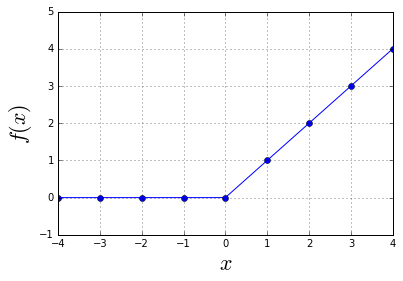

In [13]:
def f(x):
    return np.maximum(0,x)
X = np.arange(-4,5,1)
Y = f(X)
plt.plot(X,Y,'o-')
plt.ylim(-1,5); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$f(x)$', fontsize=22)

## Функция ошибки mae(mean absolute error) - 

$$MAE = \frac{1}{n}\sum_{i=1}^n \mid f_i-y_i \mid$$

f - полученное значение

y - нужное значение

n - количество значений

## Оптимизационная функция adam(Adaptive Moment Estimation) - Метод адаптивной инерции 

Алгоритм вычисляет адаптивный шаг обучения (learning rate) для каждого параметра в отдельности, учитывая историю всех прошлых градиентов для этого параметра. 
Это делается путем деления каждого элемента в градиенте на квадратный корень суммы квадратов прошлых соответствующих элементов градиента.
В дополнение к хранению прошлых градиентов $V_t$, adam также сохраняет скользящие средние прошлых градиентов $m_t$:
$$m_t = \beta_1m_{t-1}+(1-\beta_1)g_t$$

$$V_t = \beta_2V_{t-1}+(1-\beta_2)g_t^2$$

$m_t$ и $V_t$ являются оценками первого момента градиентов (скользящее среднее) и второго момента градиентов (центрированной дисперсии).

# Результаты обучения

Показаны предсказания модели и правильный результат для первых 5 тестировочных примеров и визуализация 2-ух кривых ошибок:
 - кривая валидационной ошибки (valid loss);
 - кривая тренировочной ошибки (train loss)

Валидационная ошибка - ошибка на валидационном множестве, выбираемом из обучающей выборки.

Тренировочная ошибка - ошибка на тестировочном множестве, которое не учавствовало в обучении.

In [9]:
for num, i in enumerate(pred, 0):
    print 'Предсказание: ', i[0], '\nПравильный ответ: ', y_test[num][0], '\n'
    if num==4:
        break

Предсказание:  0.589808 
Правильный ответ:  0.592813970636 

Предсказание:  0.470502 
Правильный ответ:  0.474327390283 

Предсказание:  0.528703 
Правильный ответ:  0.532715838476 

Предсказание:  0.69149 
Правильный ответ:  0.692620866228 

Предсказание:  0.467676 
Правильный ответ:  0.471901299742 



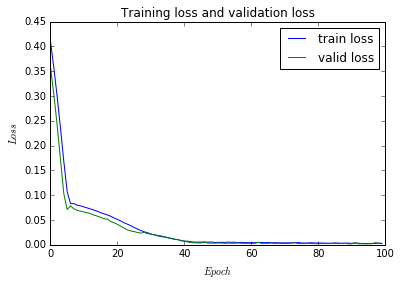

In [14]:
# Визуализация 2-ух кривых ошибок:
plt.figure()
plt.title("Training loss and validation loss")
plt.plot(history.history["loss"], label = 'train loss')
plt.plot(history.history["val_loss"], label = 'valid loss')
plt.xlabel("$Epoch$")
plt.ylabel("$Loss$")
plt.legend()
plt.show()